<a href="https://colab.research.google.com/github/Jacqy-coder/Credit-default-/blob/main/credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#data
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score








In [ ]:
#read and import dataset
df = pd.read_csv('credit.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [ ]:
df.nunique()

,0
person_age,58
person_income,4295
person_home_ownership,4
person_emp_length,36
loan_intent,6
loan_grade,7
loan_amnt,753
loan_int_rate,348
loan_status,2
loan_percent_income,77


In [ ]:
df.loan_status.value_counts()

,count
loan_status,
0,25473
1,7108


In [ ]:
df.duplicated().sum()

np.int64(165)

In [ ]:
dup_rows = df[df.duplicated(keep=False)]
dup_rows

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
14,23,115000,RENT,2.0,EDUCATION,A,35000,7.90,0,0.30,N,4
238,22,183000,MORTGAGE,3.0,EDUCATION,A,1000,NaN,0,0.01,N,2
252,24,85000,RENT,5.0,MEDICAL,B,25000,10.62,0,0.29,N,4
591,26,20000,MORTGAGE,5.0,MEDICAL,A,4800,5.99,0,0.24,N,3
740,21,21600,OWN,NaN,VENTURE,A,7125,6.99,0,0.33,N,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


In [ ]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [ ]:
#replacing the loan interest rate based on the loan amount

df['loan_int_rate'] = df.groupby('loan_amnt')['loan_int_rate'].transform(
    lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x
)




In [ ]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,23
loan_status,0
loan_percent_income,0


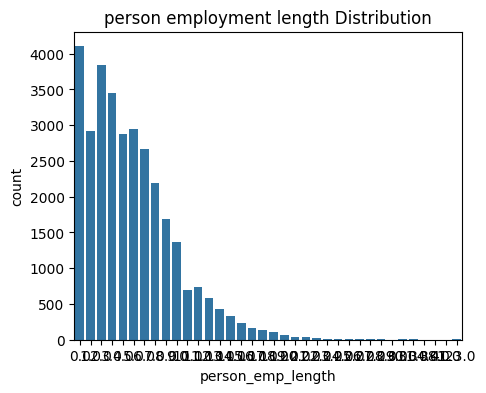

In [ ]:
if 'person_emp_length' in df.columns:
  plt.figure(figsize=(5,4))
  sns.countplot(x='person_emp_length', data=df)
  plt.title('person employment length Distribution')
  plt.show()

In [ ]:
#since it is not a normal distribution we can populate the section with the median
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())

In [ ]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,23
loan_status,0
loan_percent_income,0


In [ ]:
df[df.isnull().any(axis=1)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
87,24,69000,RENT,2.0,HOMEIMPROVEMENT,A,27600,NaN,1,0.40,N,2
1430,23,38000,RENT,0.0,DEBTCONSOLIDATION,A,1075,NaN,0,0.03,N,3
8378,25,57500,MORTGAGE,5.0,MEDICAL,C,12275,NaN,0,0.21,Y,3
12133,22,40000,RENT,0.0,PERSONAL,A,11575,NaN,0,0.29,N,3
12172,23,74000,MORTGAGE,5.0,DEBTCONSOLIDATION,D,25975,NaN,1,0.35,N,2
13777,26,64900,RENT,4.0,MEDICAL,B,13625,NaN,0,0.21,N,3
14270,25,103000,MORTGAGE,4.0,PERSONAL,A,29175,NaN,0,0.28,N,2
16871,25,57500,MORTGAGE,5.0,HOMEIMPROVEMENT,C,12275,NaN,0,0.21,N,3
17883,29,74000,RENT,2.0,DEBTCONSOLIDATION,D,30750,NaN,1,0.42,N,6
18278,34,69600,RENT,10.0,VENTURE,A,22650,NaN,1,0.33,N,6


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
print(df.duplicated().sum())

0


In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


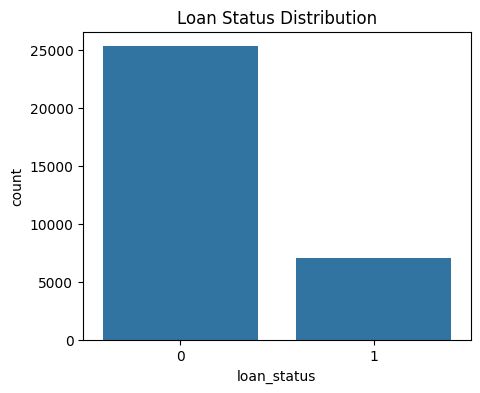

In [ ]:
#visualise  target values

if 'loan_status' in df.columns:
  plt.figure(figsize=(5,4))
  sns.countplot(x='loan_status', data=df)
  plt.title('Loan Status Distribution')
  plt.show()


In [ ]:
#encode categorical column for visualisation
le = LabelEncoder()
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
  df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))


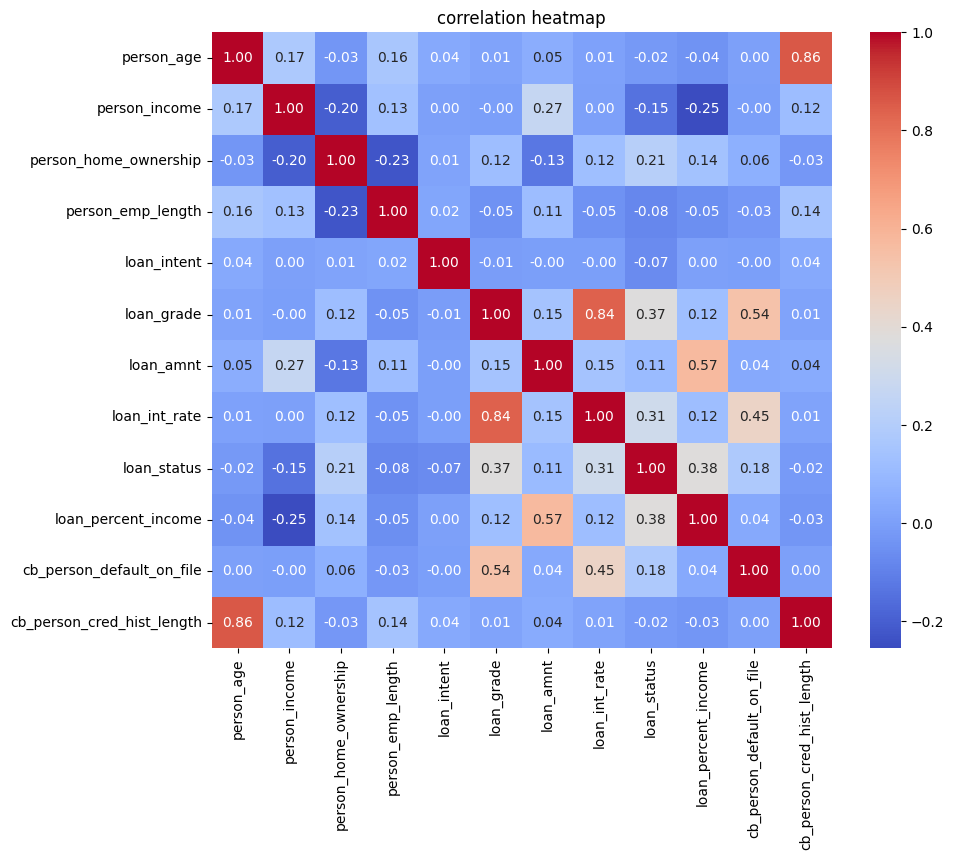

In [ ]:
#correlation Heatmap

plt.figure(figsize=((10,8)))
corr = df_encoded.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlation heatmap')
plt.show()


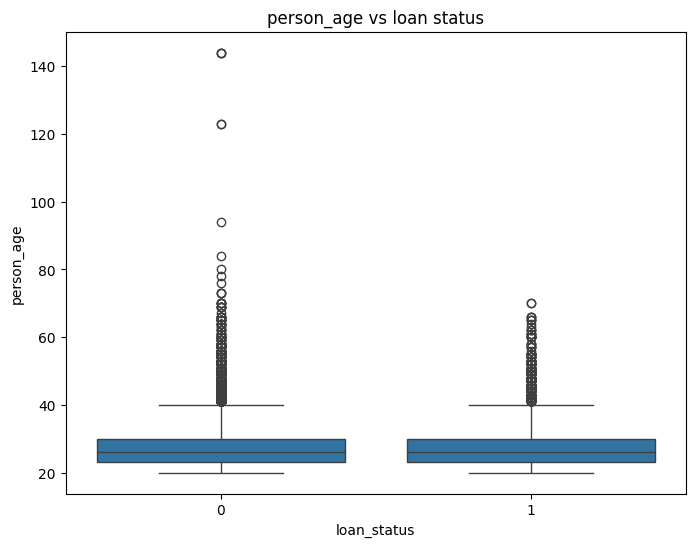

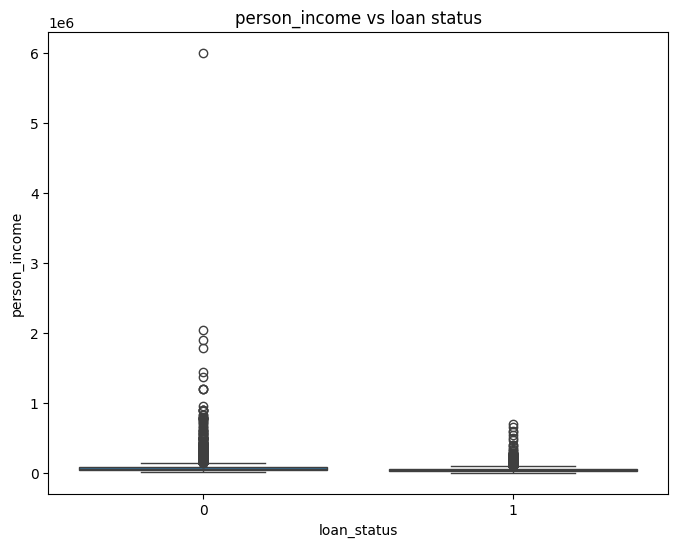

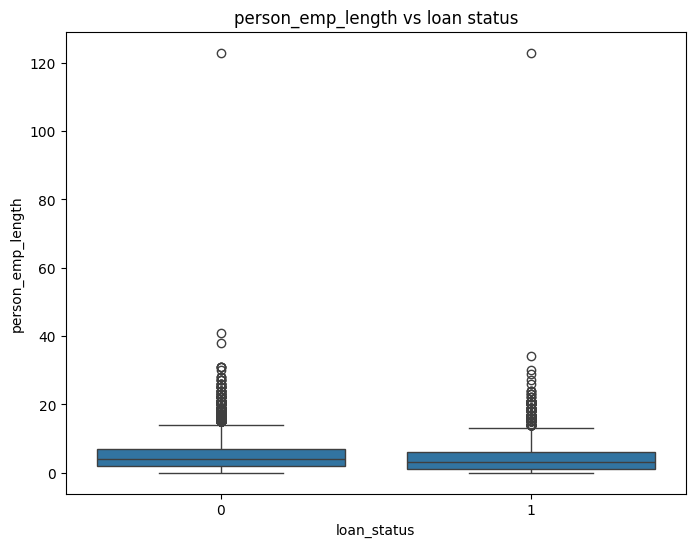

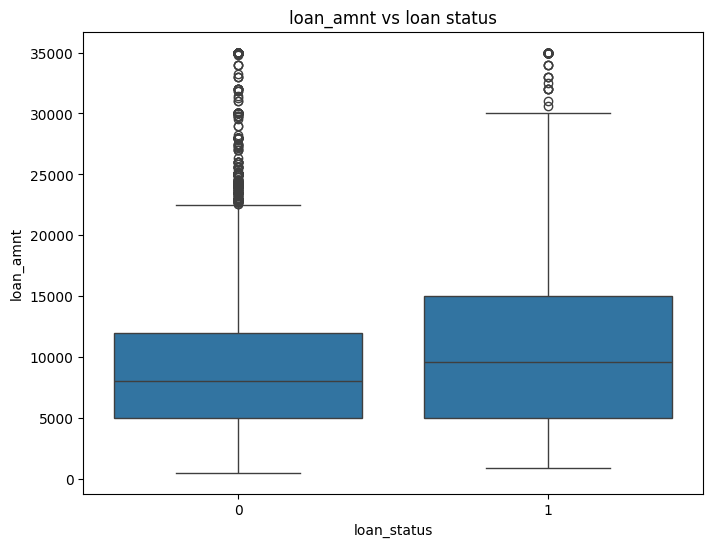

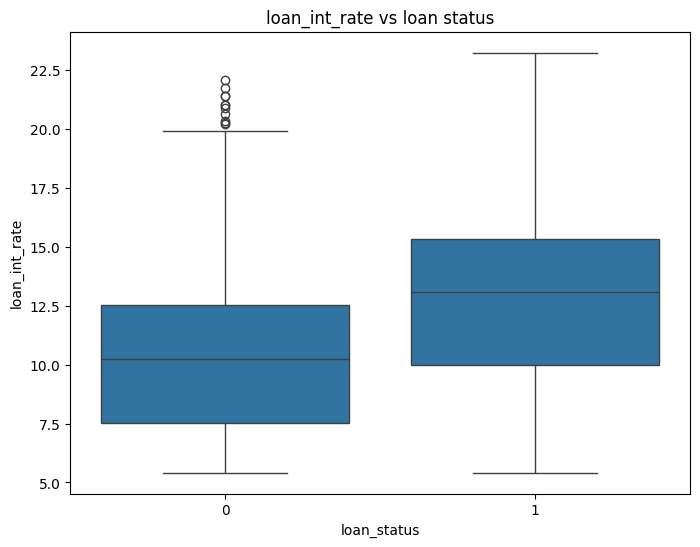

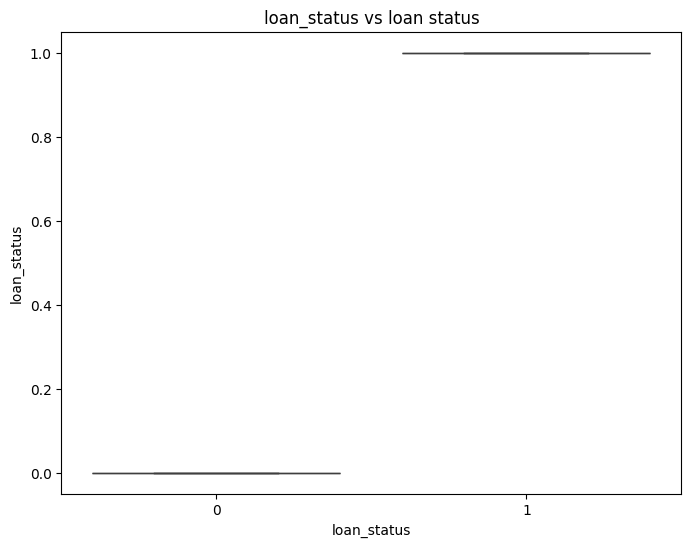

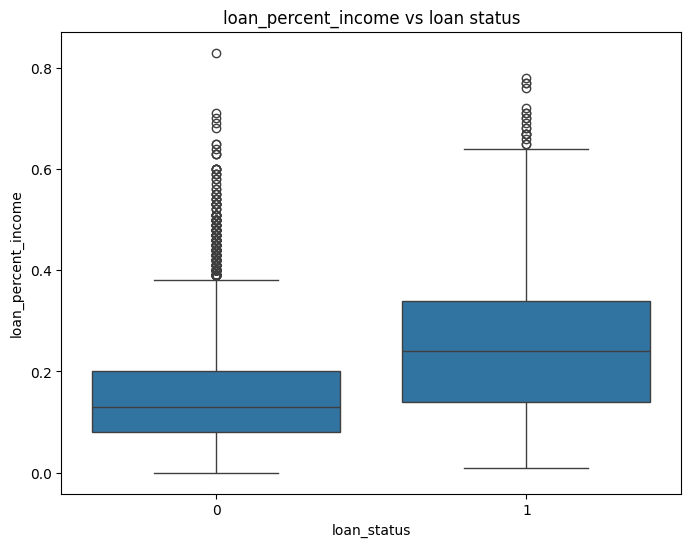

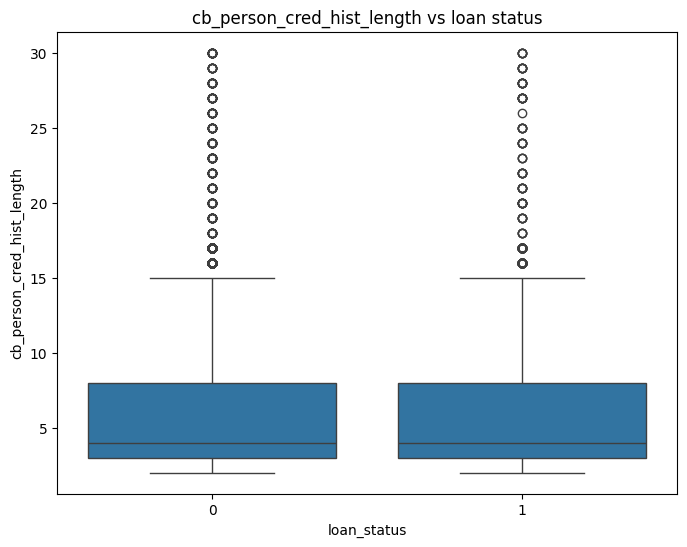

In [ ]:
#boxplots for numeric feature by loan status
numerics = df.select_dtypes(include=np.number). columns.tolist()
for col in numerics:
  if col !='loan status' and 'loan_status' in df.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=df, x='loan_status', y=col)
    plt.title(f'{col} vs loan status')
    plt.show()

In [ ]:
#encode ctegorical column
df_encoded = df.copy()
for col in df.select_dtypes(include='object').columns:
  df[col] = le.fit_transform(df[col].astype(str))

In [ ]:
df_encoded.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4


In [ ]:
#drop rows that have high colelatiom and define x and y

x = df.drop(['loan_status', 'person_age', 'loan_grade'], axis=1)
y = df['loan_status']

In [ ]:
x.head()

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,59000,3,123.0,4,35000,16.02,0.59,1,3
1,9600,2,5.0,1,1000,11.14,0.10,0,2
2,9600,0,1.0,3,5500,12.87,0.57,0,3
3,65500,3,4.0,3,35000,15.23,0.53,0,2
4,54400,3,8.0,3,35000,14.27,0.55,1,4


In [ ]:
y.head()

,loan_status
0,1
1,0
2,1
3,1
4,1


In [ ]:
#split into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
#scale features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
print(x_train_scaled)

[[ 1.92723721e-01  9.25909949e-01 -1.16239577e+00 ... -1.10028449e-03
   2.16428770e+00  1.04110014e+00]
 [-2.54461176e-01  9.25909949e-01 -1.88335592e-01 ... -2.82476326e-01
  -4.62045780e-01  7.93567577e-01]
 [-4.49018548e-01  9.25909949e-01  5.51794529e-02 ...  2.15611604e+00
  -4.62045780e-01 -6.91627795e-01]
 ...
 [-5.89785965e-01  2.28185955e-01 -9.18880727e-01 ... -9.39020424e-01
   2.16428770e+00 -6.91627795e-01]
 [-3.34315622e-01 -1.16726203e+00 -4.31850637e-01 ...  9.26917294e-02
   2.16428770e+00 -6.91627795e-01]
 [ 3.84374391e-01  9.25909949e-01 -6.75365682e-01 ...  1.03061187e+00
  -4.62045780e-01  2.98502453e-01]]


In [ ]:

x_train.isnull().sum()

,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0
cb_person_default_on_file,0
cb_person_cred_hist_length,0


In [ ]:
 #apply SMOTE only to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

In [ ]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Train SVM (with probability=True for AUC later)
svm = SVC(kernel='rbf', C=1, gamma='scale', probability=True)
svm.fit(X_train_resampled, y_train_resampled)

# Train Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import classification_report

# Predict on test set
rf_preds = rf.predict(x_test_scaled)
svm_preds = svm.predict(x_test_scaled)
logreg_preds = logreg.predict(x_test_scaled)

# Show reports
print("Random Forest (SMOTE):\n", classification_report(y_test, rf_preds))
print("SVM (SMOTE):\n", classification_report(y_test, svm_preds))
print("Logistic Regression (SMOTE):\n", classification_report(y_test, logreg_preds))


Random Forest (SMOTE):
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      5063
           1       0.87      0.72      0.79      1416

    accuracy                           0.91      6479
   macro avg       0.90      0.84      0.87      6479
weighted avg       0.91      0.91      0.91      6479

SVM (SMOTE):
               precision    recall  f1-score   support

           0       0.93      0.85      0.89      5063
           1       0.58      0.76      0.66      1416

    accuracy                           0.83      6479
   macro avg       0.76      0.81      0.77      6479
weighted avg       0.85      0.83      0.84      6479

Logistic Regression (SMOTE):
               precision    recall  f1-score   support

           0       0.92      0.76      0.83      5063
           1       0.47      0.76      0.58      1416

    accuracy                           0.76      6479
   macro avg       0.69      0.76      0.70      6479
weight

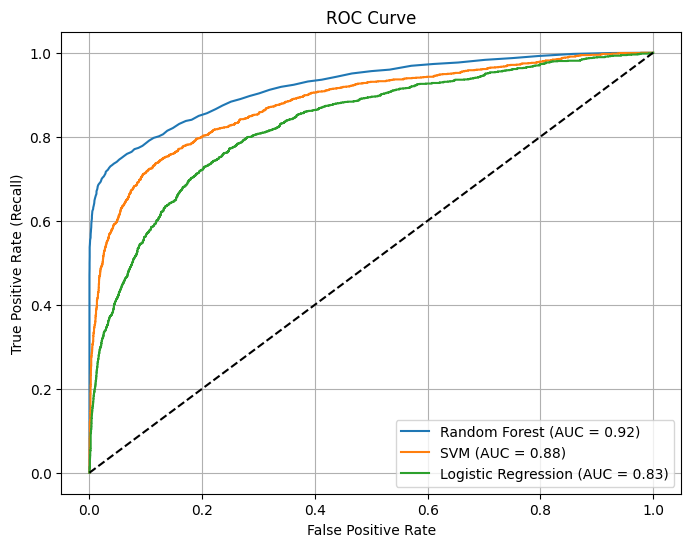

In [ ]:
# Get probabilities of default (class 1)
rf_probs = rf.predict_proba(x_test_scaled)[:, 1]
svm_probs = svm.predict_proba(x_test_scaled)[:, 1]
logreg_probs = logreg.predict_proba(x_test_scaled)[:, 1]

# Compute ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
fpr_log, tpr_log, _ = roc_curve(y_test, logreg_probs)

# AUC scores
auc_rf = roc_auc_score(y_test, rf_probs)
auc_svm = roc_auc_score(y_test, svm_probs)
auc_log = roc_auc_score(y_test, logreg_probs)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot([0,1], [0,1], 'k--')  # diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

In [ ]:
#Predict default probabilities on the test set
rf_probs = rf.predict_proba(x_test_scaled)[:, 1]  # probabilities of class 1 (default)

In [ ]:
 #Apply a threshold to flag risky applicants
threshold = 0.35
rf_preds = (rf_probs >= threshold).astype(int)


In [ ]:
#Create a DataFrame with results
results_df = pd.DataFrame(x_test_scaled, columns=[f"feature_{i}" for i in range(x_test_scaled.shape[1])])
results_df['Actual'] = y_test.reset_index(drop=True)
results_df['Predicted'] = rf_preds
results_df['Risk_Score'] = rf_probs




In [ ]:
# Evaluate
print("=== Evaluation with Threshold = 0.35 ===")
print(classification_report(y_test, rf_preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_preds))



=== Evaluation with Threshold = 0.35 ===
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      5063
           1       0.69      0.79      0.73      1416

    accuracy                           0.87      6479
   macro avg       0.81      0.84      0.83      6479
weighted avg       0.88      0.87      0.88      6479

Confusion Matrix:
[[4553  510]
 [ 304 1112]]


In [ ]:
#Save predictions to CSV
results_df.to_csv("loan_risk_predictions.csv", index=False)


In [ ]:
#prediction on actual data not the scaled
rf_probs = rf.predict_proba(x_test_scaled)[:, 1]


In [ ]:
#Apply custom threshold (e.g., 0.35)
threshold = 0.35
rf_preds = (rf_probs >= threshold).astype(int)

In [ ]:
#Reset test index (optional, for clean merging)
x_test_original = x_test.reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)

In [ ]:
#Combine original features, actuals, predictions, and risk scores
results_df = x_test_original.copy()
results_df['Actual'] = y_test_reset
results_df['Predicted'] = rf_preds
results_df['Risk_Score'] = rf_probs

In [ ]:
#View and export results
print("=== Evaluation with Threshold = 0.35 ===")
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))


=== Evaluation with Threshold = 0.35 ===
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      5063
           1       0.69      0.79      0.73      1416

    accuracy                           0.87      6479
   macro avg       0.81      0.84      0.83      6479
weighted avg       0.88      0.87      0.88      6479

Confusion Matrix:
 [[4553  510]
 [ 304 1112]]


In [ ]:
#View top high-risk applicants
high_risk = results_df[results_df['Predicted'] == 1].sort_values(by="Risk_Score", ascending=False)
print("\nTop High-Risk Applicants:")
display(high_risk.head())


Top High-Risk Applicants:


,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,Actual,Predicted,Risk_Score
2667,37440,3,5.0,4,15000,7.90,0.40,0,8,1,1,1.0
140,59000,3,2.0,4,18000,16.00,0.31,1,2,1,1,1.0
9,26000,3,0.0,1,8000,11.99,0.31,0,4,1,1,1.0
6434,38643,3,7.0,4,12000,11.58,0.31,0,8,1,1,1.0
6436,27000,3,6.0,3,10000,10.65,0.37,0,3,1,1,1.0


In [ ]:
#Save predictions to CSV
results_df.to_csv("loan_default_risk_predictions.csv", index=False)